In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
import numpy as np
from tool.model import net
from tool.evaluate import *

In [3]:
model = net().to('cuda')
inputs = torch.Tensor(np.load('inputs.npy')).to('cuda')
labels = np.load('outputs.npy')

In [4]:
checkpoint = torch.load('model_10000.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

net(
  (remap): Conv3d(3, 8, kernel_size=(2, 2, 2), stride=(2, 1, 1), padding=(0, 0, 128))
  (remapT): ConvTranspose3d(8, 3, kernel_size=(3, 2, 1), stride=(2, 1, 1), padding=(0, 0, 103))
  (encoder): Sequential(
    (0): Conv3d(8, 16, kernel_size=(2, 2, 2), stride=(1, 1, 1), padding=same)
    (1): LeakyReLU(negative_slope=0.1)
    (2): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv3d(16, 32, kernel_size=(2, 2, 2), stride=(1, 1, 1), padding=same)
    (4): LeakyReLU(negative_slope=0.1)
    (5): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv3d(32, 64, kernel_size=(2, 2, 2), stride=(1, 1, 1), padding=same)
    (7): LeakyReLU(negative_slope=0.1)
    (8): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv3d(64, 128, kernel_size=(2, 2, 2), stride=(1, 1, 1), padding=same)
    (10): LeakyReLU(negative_slope=0.1)
    (11): MaxPool3d(kernel_size=2, stride=2, padding=0, dilatio

In [5]:
idx = 0

In [6]:
b = model(inputs[idx, ...])
B = labels[idx, ...]

/userhome/jeon_mg/miniforge3/envs/pinn_torch/lib/python3.10/site-packages/torch/nn/modules/conv.py:605: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/Convolution.cpp:1008.)
  return F.conv3d(


In [7]:
bb = b.cpu().detach().numpy().transpose(1, 2, 3, 0)
BB = B.transpose(1, 2, 3, 0)

In [8]:
metric(bb, BB)

{'c_vec': 0.66261315,
 'c_cs': 0.5358853846678954,
 "E_n'": 0.2002929449081421,
 "E_m'": -0.046615544481610316,
 'eps': 0.62797034}

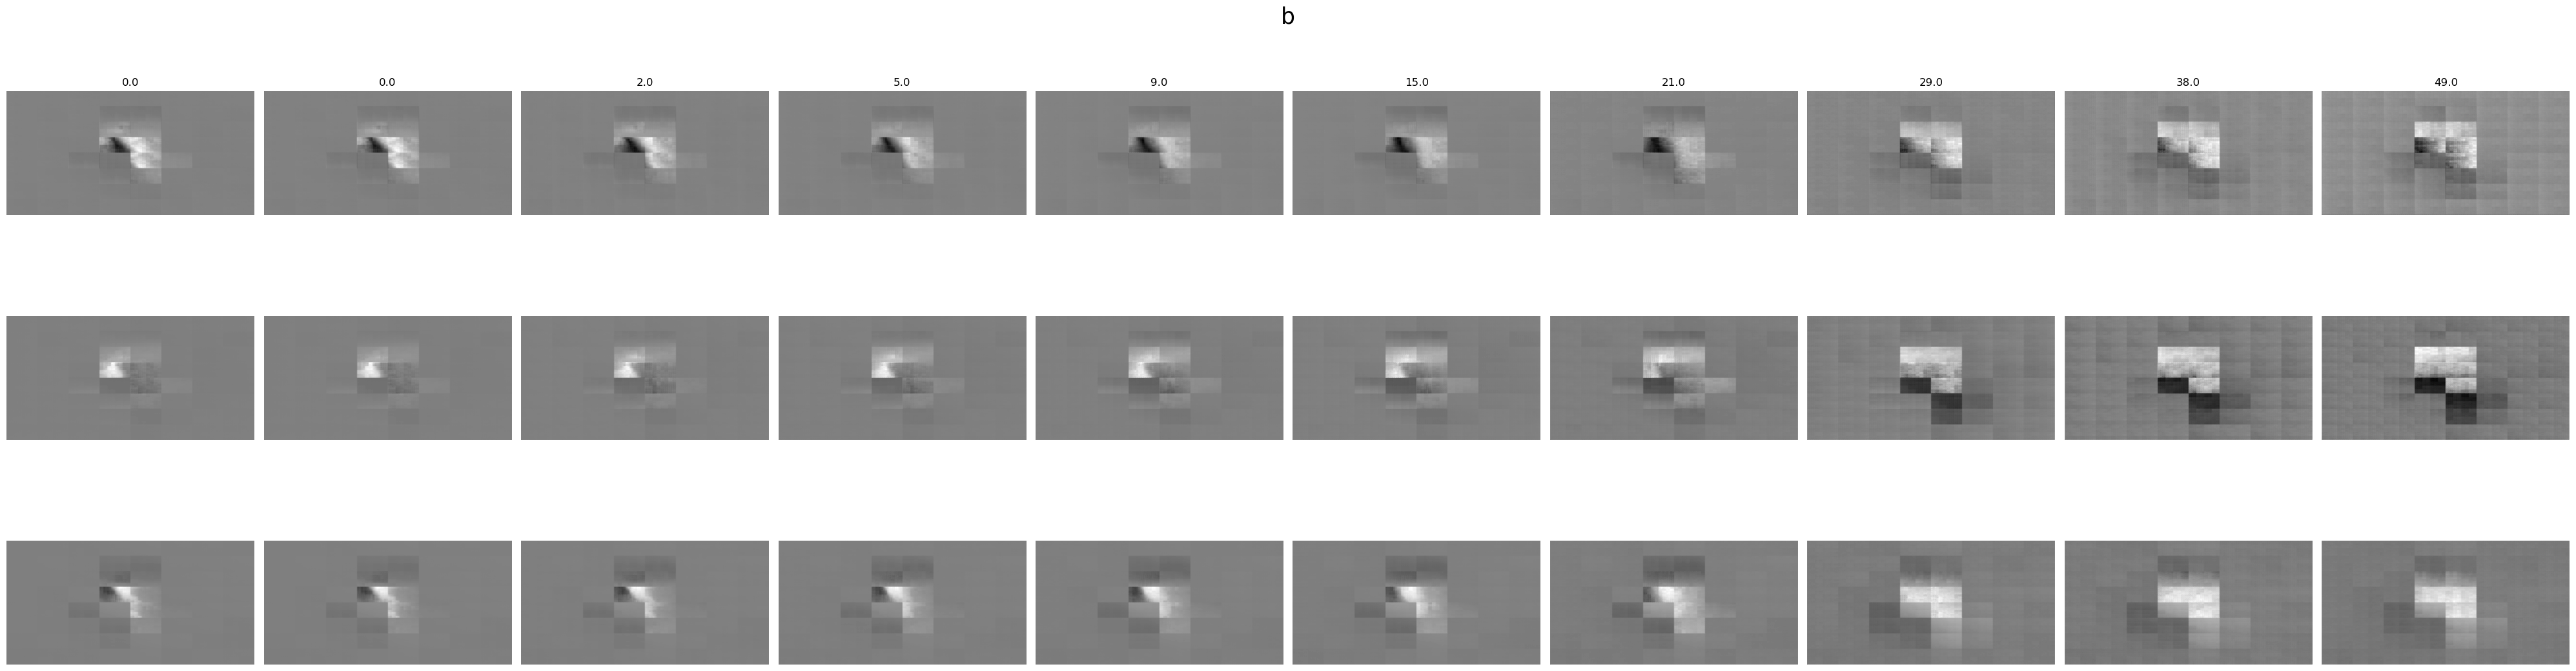

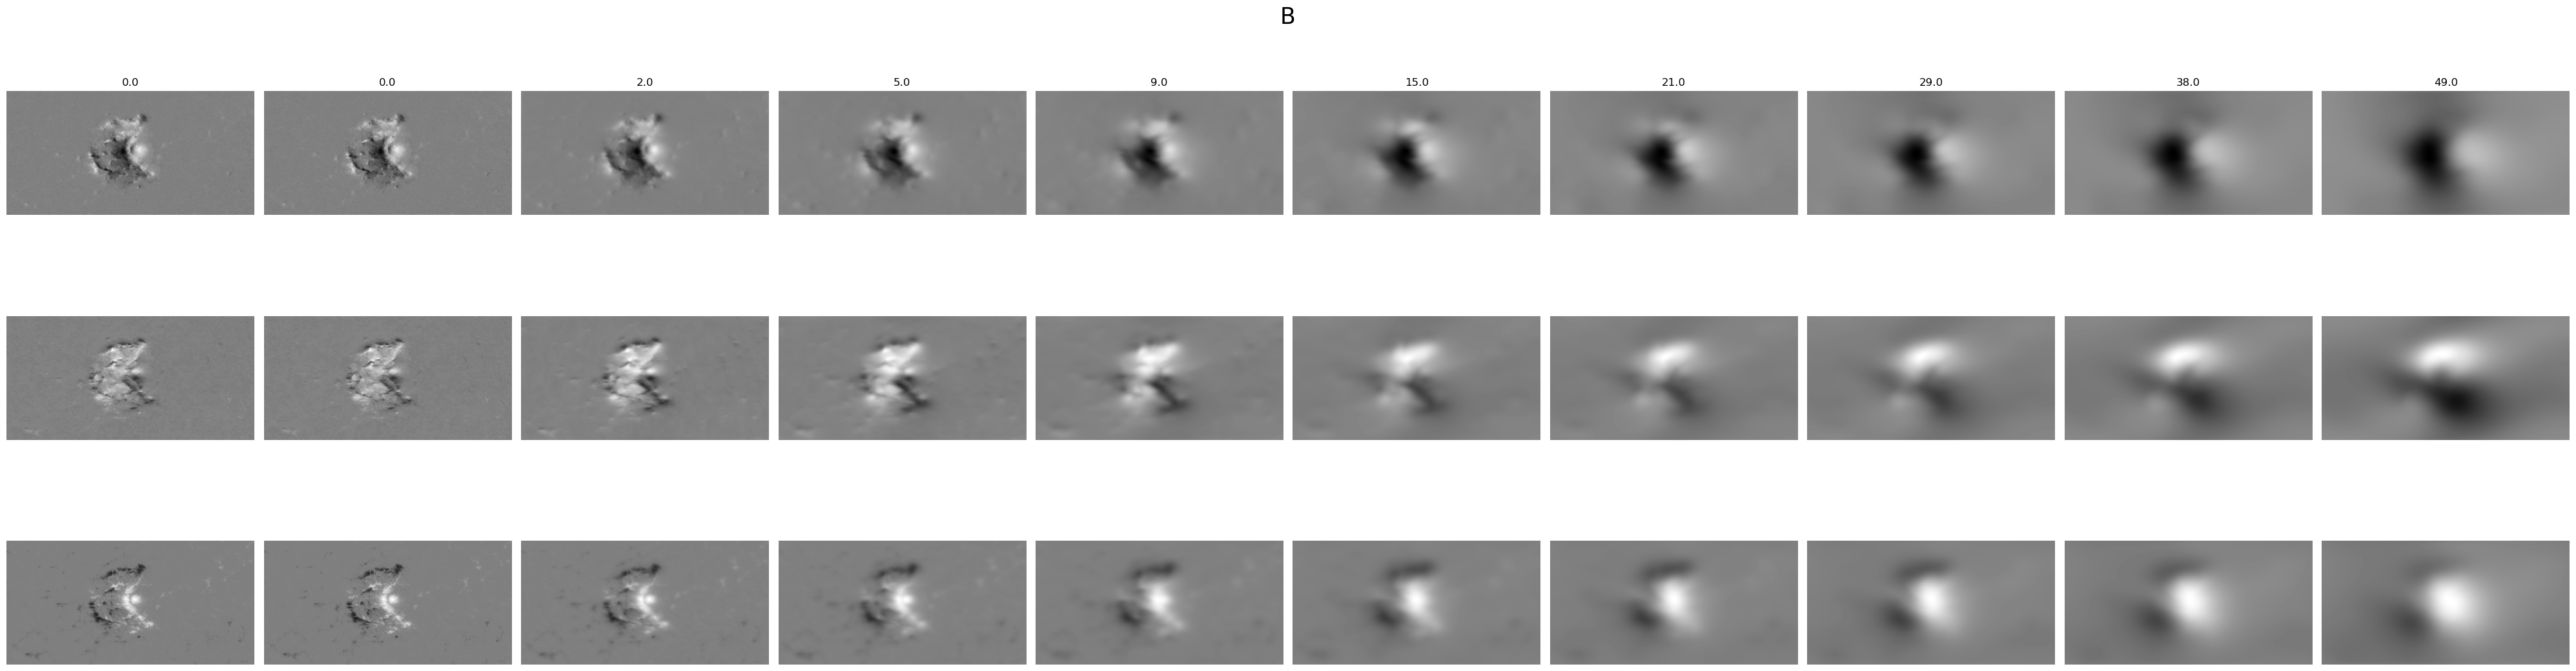

In [9]:
plot_sample(bb, BB)